# Machine Learning and Statistics
## GMIT H.Dip in Data Analytics Diarmuid Whelan Oct 2019 
###  Boston House Prices

Download libraries and Boston house price dataset. Manipulate and process the dataset to begin exploratory data analysis

In [4]:
####Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt

%matplotlib inline



In [5]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Load the sklearn dataset
from sklearn.datasets import load_boston
boston_house_prices = load_boston()
prices = boston_house_prices.target # Define the target values
features = boston_house_prices.data # Define the attribute values

#Store in DataFrame - Easier manipulation
attributes = boston_house_prices.feature_names # feature name(s)
data    = pd.DataFrame(features, columns = attributes)
target  = pd.DataFrame(prices, columns =['MEDV'])
boston  = pd.concat([data, target,], axis = 1) #concat data/target

The Boston House Price dataset derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA.


The features contained in the dataset are:


CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per 10,000 USD

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - percentage lower status of the population

MEDV - Median value of owner-occupied homes in 1000 USD


## Exploratory Data Analysis
Examine the characteristics of the dataset

Calculate summary statistics and correlations

There are 506 records of the above features and theyare all numerical data type


In [25]:
#print(boston_house_prices.keys())
print(boston.shape)
print(boston.dtypes)
print(boston.head)

#print(target.head)

(506, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object
<bound method NDFrame.head of          CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5

In [26]:
print(boston.describe())

print(boston.corr(method='pearson'))

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

### Visualisations
Examine correlations, distributions and visualise the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B84AE58BE0>,
      dtype=object)

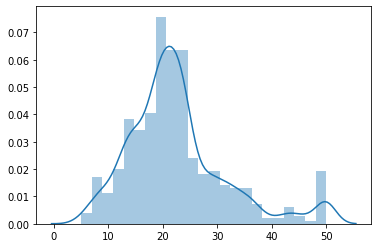

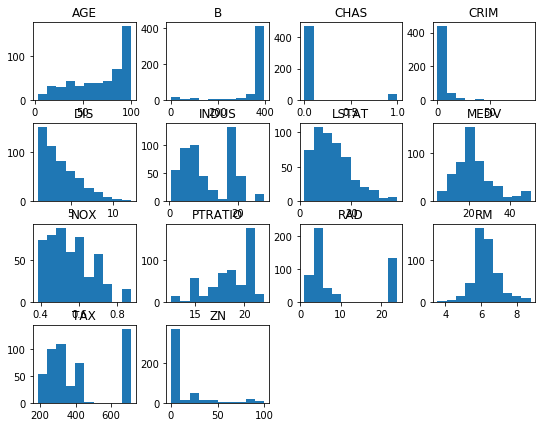

In [37]:
#Distribution of the target variable - looks normally distributed
sns.distplot(target)
#Print histogram of each feature
boston.hist(bins=10,figsize=(9,7),grid=False)

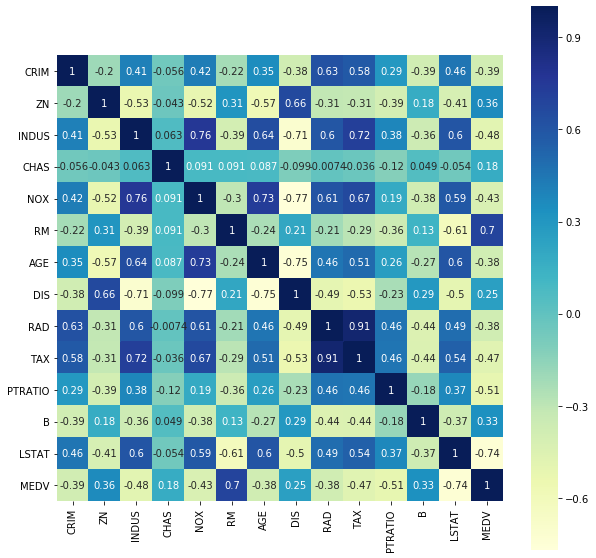

In [46]:


plt.figure(figsize=(10, 10))
#display a correlation matrix
correlations = boston.corr()
sns.heatmap(correlations,square = True, cmap = "YlGnBu", annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

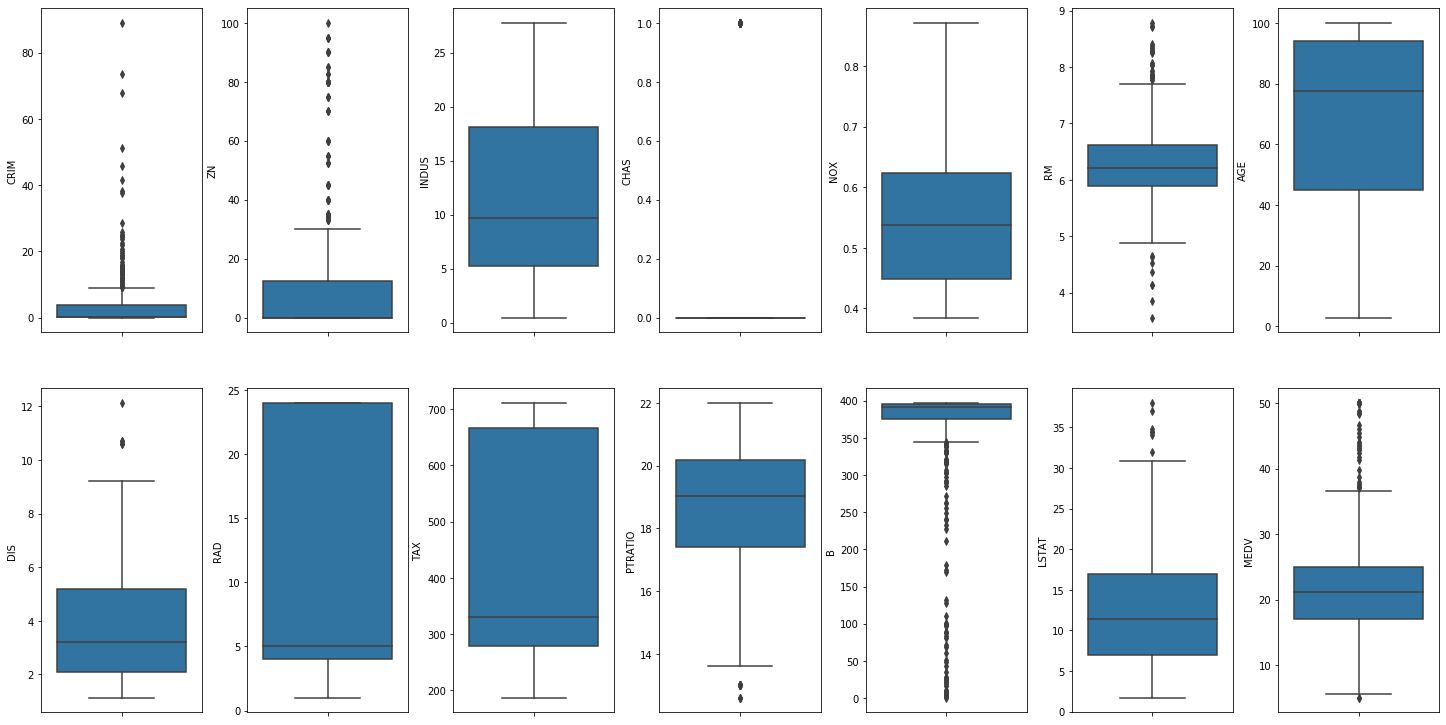

In [31]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston.items():
    sns.boxplot(y=k, data=boston, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

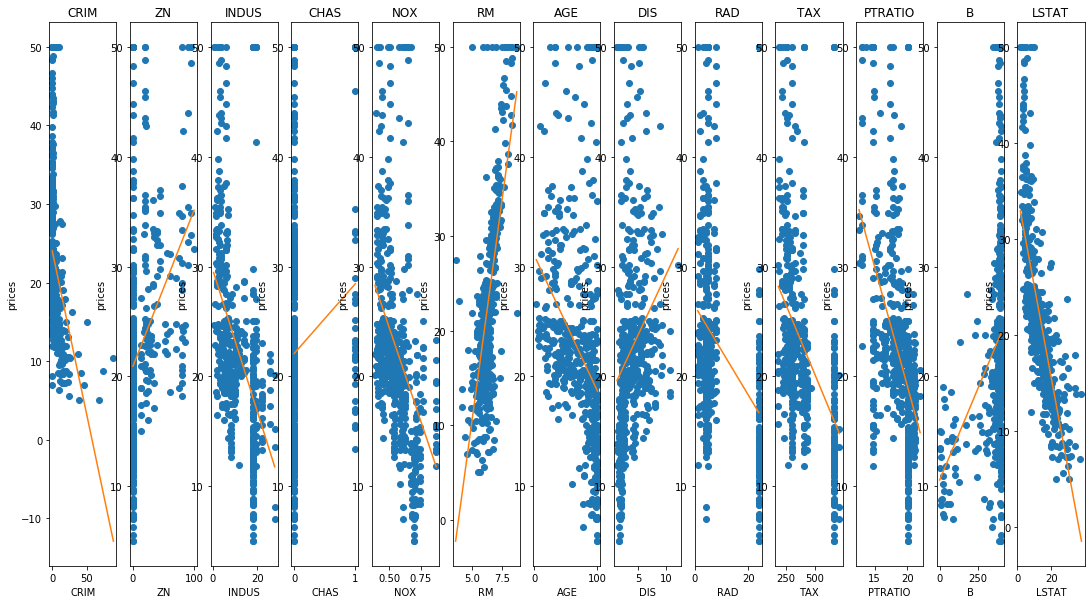

In [54]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))


for i, col in enumerate(data.columns):
    
    plt.subplot(1, 14, i+1)
    x = data[col]
    y = prices
    plt.plot(x, y, 'o')
    # Add regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')